# Hotel Booking Cancellations — Project Overview 

**Objective:** Predict hotel booking cancellations and identify the main factors that influence cancellations so business stakeholders can reduce revenue loss.

**What this notebook contains:**
- Data loading and initial checks
- Exploratory Data Analysis (EDA) with visualizations
- Data cleaning and feature engineering
- Model training (Logistic Regression, Random Forest)
- Model evaluation and business recommendations


In [298]:
import numpy as np
import pandas as pd
import seaborn as sns


In [299]:
df=pd.read_csv("hotel.csv")

## Data Loading & Description 

We load the dataset here. Key notes:
- Source file: `hotel.csv` (raw data snapshot)
- Important columns: `is_canceled` (target), `lead_time`, `adr` (average daily rate), guest counts, arrival date components, deposit_type, market_segment, and customer_type.

understanding the raw columns helps guide cleaning and feature engineering decisions.

In [300]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [301]:
df.shape

(119390, 32)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [303]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [304]:
df['is_canceled'].value_counts(normalize=True)*100


is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64

In [305]:
df.isnull().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

### Initial EDA — What to look for 

Run these checks to get a quick sense of the data:
- `df.head()` shows sample rows and column types
- `df.shape` gives the dataset size (rows × columns)
- `df.info()` shows missing values and data types
- `df.isnull().sum()` highlights columns needing cleaning


In [306]:
df['children'] = df['children'].fillna(0)


### Missing Values — Strategy & Rationale 

We fill missing values with domain-aware defaults:
- `children` filled with `0` because a missing value usually implies no children recorded
- `country` filled with the mode (most common) to avoid adding rare categories
- `agent` and `company` set to `0` where missing because they are ID fields and `0` indicates 'no agent/company'


In [307]:
df['country'] = df['country'].fillna(df['country'].mode()[0])


In [308]:
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)


In [309]:
df[(df['adults'] + df['children'] + df['babies']) == 0].shape


(180, 32)

In [310]:
df['hotel'].value_counts()




hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [311]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [312]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

### Which hotel type has the higher cancellation rate?

We compare cancellation rates between hotel categories using a normalized crosstab and a stacked bar chart. Interpret the bars as the percentage of bookings that were canceled vs. not canceled for each hotel type — this highlights which hotel types are at higher risk.

In [313]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize='index')*100


is_canceled,0,1
hotel,,
City Hotel,58.273037,41.726963
Resort Hotel,72.236645,27.763355


In [314]:
df.corr(numeric_only=True)['is_canceled'].sort_values(ascending=False)*100


is_canceled                       100.000000
lead_time                          29.312336
previous_cancellations             11.013281
adults                              6.001721
days_in_waiting_list                5.418582
adr                                 4.755660
stays_in_week_nights                2.476463
arrival_date_year                   1.665986
arrival_date_week_number            0.814807
children                            0.503625
stays_in_weekend_nights            -0.179108
arrival_date_day_of_month          -0.613008
babies                             -3.249109
agent                              -4.652945
previous_bookings_not_canceled     -5.735772
company                            -8.299480
is_repeated_guest                  -8.479342
booking_changes                   -14.438099
required_car_parking_spaces       -19.549782
total_of_special_requests         -23.465777
Name: is_canceled, dtype: float64

Initial exploratory data analysis (EDA) was performed to:

- Identify missing values and data types
- Detect outliers and unusual records
- Check class balance of the target (`is_canceled`) and other key distributions

These checks guide later cleaning and modeling choices.

### Booking counts by hotel type

Use the bar chart to see how bookings are distributed across hotel categories (e.g., City vs. Resort). This helps verify whether the dataset is balanced and if sampling adjustments will be needed for modeling.

<Axes: xlabel='hotel', ylabel='count'>

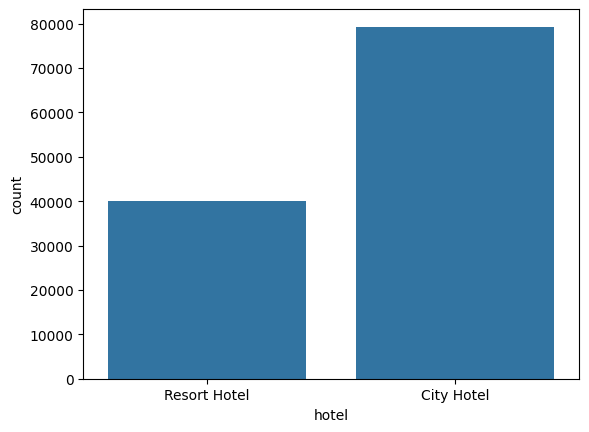

In [315]:
sns.countplot(x='hotel', data=df)


### Cancellation rate — overall percentage

Visualize the proportion of canceled vs. non-canceled bookings. Use percentages to assess class imbalance and decide whether to apply class weights or resampling in the modeling step.

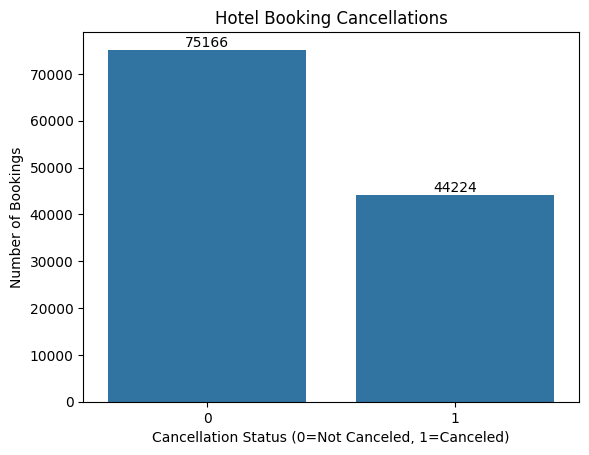

In [316]:
import matplotlib.pyplot as plt
ax=sns.countplot(x='is_canceled', data=df)
plt.xlabel('Cancellation Status (0=Not Canceled, 1=Canceled)')
plt.ylabel('Number of Bookings')
plt.title('Hotel Booking Cancellations')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Cancellation rate by hotel type

Compare cancellation percentages by hotel type with a stacked bar chart. This reveals whether certain hotel types have systematically higher cancellation risks and may need targeted actions.

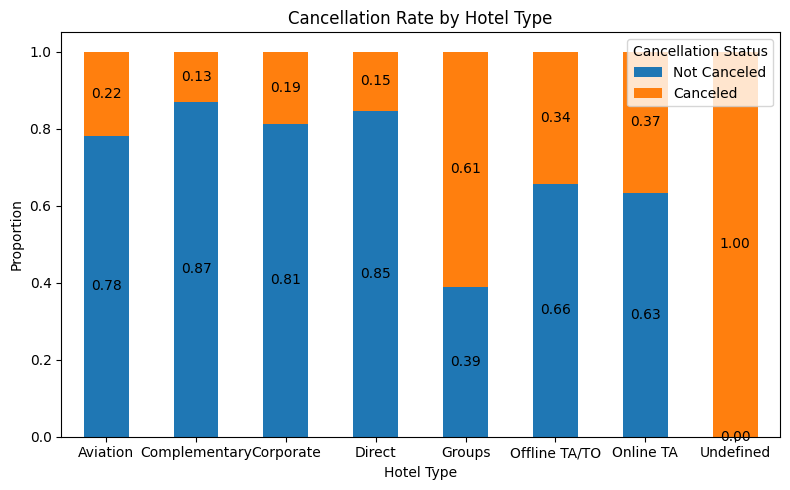

In [317]:
crosstab_result= pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index')
ax=crosstab_result.plot(kind='bar', stacked=True,figsize=(8,5))
plt.xlabel('Hotel Type')
plt.ylabel('Proportion')
plt.title('Cancellation Rate by Hotel Type')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'], loc='upper right')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Does lead time affect cancellation?

Use a boxplot to compare `lead_time` distributions for canceled vs. non-canceled bookings. Longer lead times can indicate higher cancellation risk — interpret differences in medians and spread.

<Axes: xlabel='is_canceled', ylabel='lead_time'>

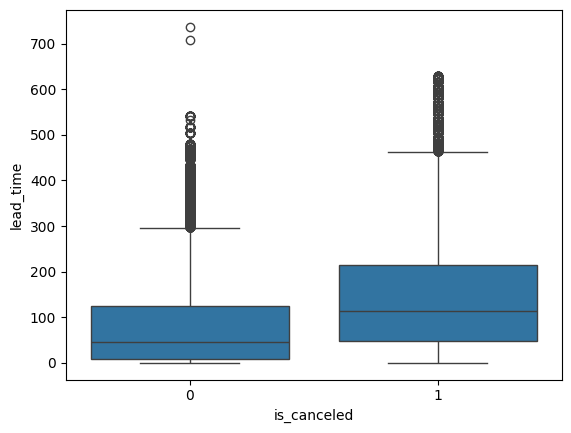

In [318]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)


### Outlier handling — lead time and ADR

We observed extreme values in `lead_time` and `adr`. To reduce variance and improve model stability we cap `lead_time` at 180 days and remove unrealistic ADR values (e.g., ADR ≥ 1000).

Keep a record of any removed rows so results remain reproducible.

In [319]:
df=df[df['lead_time']<=180]
df.shape

(94698, 32)

<Axes: xlabel='is_canceled', ylabel='lead_time'>

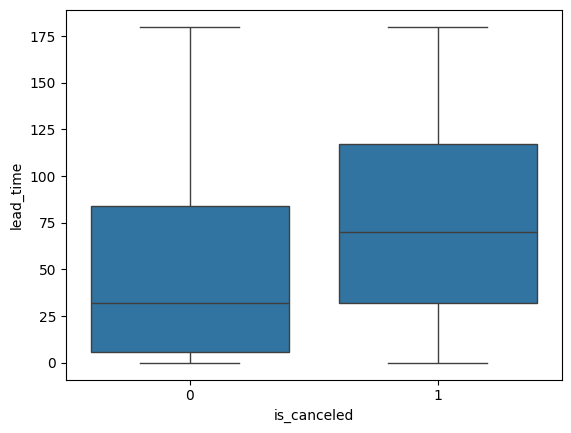

In [320]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)


### Does deposit type reduce cancellations?

Visualize cancellations by `deposit_type` to see if bookings with deposits are less likely to cancel. Translate results into business action: deposits can be a lever to reduce cancellations if a clear association exists.

<Axes: xlabel='deposit_type', ylabel='count'>

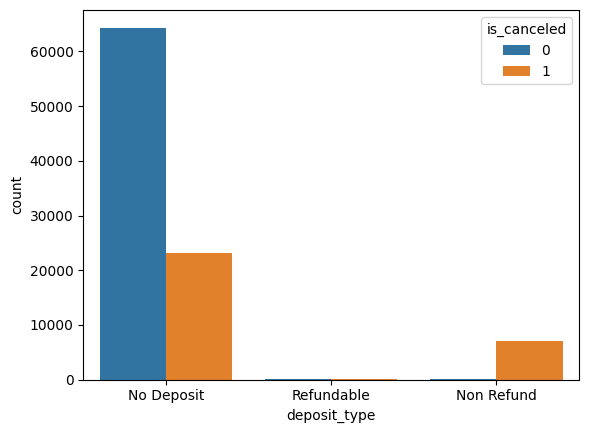

In [321]:
sns.countplot(x='deposit_type', hue='is_canceled', data=df)


<Axes: xlabel='is_canceled', ylabel='adr'>

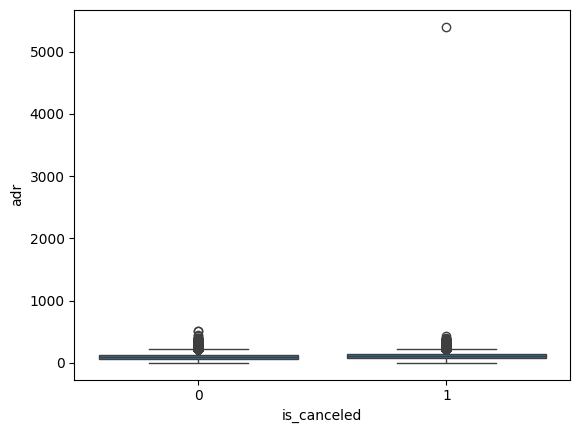

In [322]:
sns.boxplot(x='is_canceled', y='adr', data=df)


### When do most cancellations occur?

Aggregate cancellations by month to detect seasonality and trends. Use the time-series plot to identify months with unusually high cancellations and consider targeted interventions during those periods.

In [323]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str)
)


In [324]:
canceled_df = df[df['is_canceled'] == 1]


In [325]:
monthly_cancellations = (
    canceled_df
    .groupby(pd.Grouper(key='arrival_date', freq='ME'))
    .size()
    .reset_index(name='cancellation_count')
)


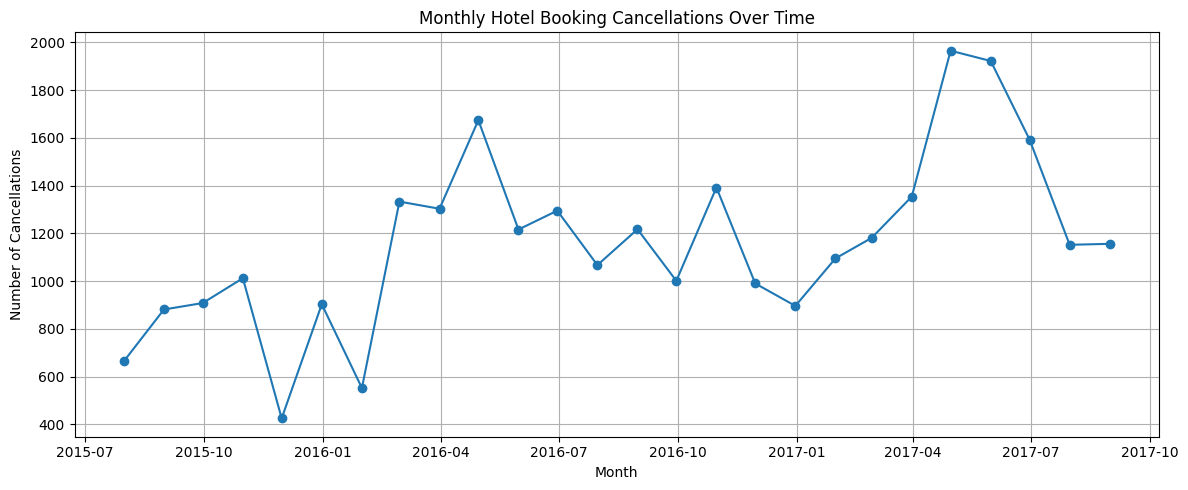

In [326]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(
    monthly_cancellations['arrival_date'],
    monthly_cancellations['cancellation_count'],
    marker='o'
)

plt.title('Monthly Hotel Booking Cancellations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.grid(True)
plt.tight_layout()
plt.show()


### Observed trend and recommendation

The time-series shows an upward trend in cancellations in recent periods. Recommendation: investigate peak months, and test targeted policies (e.g., deposits or promotions) during those high-risk windows.

In [327]:
invalid_bookings = df[(df['adults'] + df['children'] + df['babies']) == 0]
invalid_bookings.shape


(169, 33)

In [328]:
df.isnull().sum().sort_values(ascending=False)


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [329]:
df_clean = df.copy()


In [330]:
df_clean['children'] = df_clean['children'].fillna(0)


In [331]:
df_clean['country'] = df_clean['country'].fillna(df_clean['country'].mode()[0])


In [332]:
df_clean['agent'] = df_clean['agent'].fillna(0)
df_clean['company'] = df_clean['company'].fillna(0)


In [333]:
df_clean = df_clean[
    (df_clean['adults'] + df_clean['children'] + df_clean['babies']) > 0
]


### Why remove bookings with zero guests?

Bookings with zero guests are invalid records and can distort analyses and model training. Removing them improves data quality and prevents misleading metrics.

In [334]:
df_clean = df_clean[df_clean['adr'] < 1000]


In [335]:
df_clean['children'] = df_clean['children'].astype(int)
df_clean['agent'] = df_clean['agent'].astype(int)
df_clean['company'] = df_clean['company'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94528 entries, 2 to 119388
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           94528 non-null  object        
 1   is_canceled                     94528 non-null  int64         
 2   lead_time                       94528 non-null  int64         
 3   arrival_date_year               94528 non-null  int64         
 4   arrival_date_month              94528 non-null  object        
 5   arrival_date_week_number        94528 non-null  int64         
 6   arrival_date_day_of_month       94528 non-null  int64         
 7   stays_in_weekend_nights         94528 non-null  int64         
 8   stays_in_week_nights            94528 non-null  int64         
 9   adults                          94528 non-null  int64         
 10  children                        94528 non-null  int64         
 11  babies

In [336]:
df_clean['total_guests'] = (
    df_clean['adults'] + df_clean['children'] + df_clean['babies']
)
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,02-07-2015,2015-07-01,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,02-07-2015,2015-07-01,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,03-07-2015,2015-07-01,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,03-07-2015,2015-07-01,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,Transient,107.0,0,0,Check-Out,03-07-2015,2015-07-01,2


In [337]:
df_clean['total_nights'] = (
    df_clean['stays_in_week_nights'] +
    df_clean['stays_in_weekend_nights']
)


In [338]:
df_clean = df_clean.drop(
    columns=['reservation_status', 'reservation_status_date']
)


### Why drop reservation status columns?

**reservation_status** and **reservation_status_date** reflect post-booking outcomes (future information) and would leak the target into the features. Dropping them prevents target leakage and preserves realistic model performance.

In [339]:
df_clean.shape


(94528, 33)

In [340]:
df_clean.to_csv("hotel_bookings_cleaned.csv", index=False)


### Data Cleaning Summary & Feature Engineering

What we created and why:
- **total_guests** = adults + children + babies — captures booking size
- **total_nights** = stays_in_week_nights + stays_in_weekend_nights — total stay length
- Removed **reservation_status** columns to prevent future-data leakage
- Saved cleaned dataset to **hotel_bookings_cleaned.csv** for reproducibility


Based on EDA, I handled missing values logically, removed invalid bookings, treated pricing outliers, engineered new features, and eliminated data leakage before modeling.

In [341]:
features = [
    'lead_time', 'adr', 'total_guests', 'total_nights',
    'previous_cancellations', 'booking_changes',
    'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests',
    'hotel', 'deposit_type', 'market_segment', 'customer_type'
]

X = df_clean[features]
y = df_clean['is_canceled']


In [342]:
X = pd.get_dummies(X, drop_first=True)


### Train-test split — preserving class balance

We split the data into training and test sets while preserving the target distribution using *stratify=y*. This ensures the test set reflects the same class proportions as the training data for fair evaluation.

### Modeling Pipeline & Preprocessing 🔧

Steps performed before modeling:
- Selected features and encoded categorical variables (one-hot encoding)
- Scaled numerical features with *StandardScaler*
- Used *train_test_split* with stratification to preserve class balance

Model choices:
- **Logistic Regression**: baseline, interpretable
- **Random Forest**: more flexible, can capture non-linear interactions

In [343]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [344]:
from sklearn.preprocessing import StandardScaler


In [345]:
num_cols = [
    'lead_time', 'adr', 'total_guests', 'total_nights',
    'previous_cancellations', 'booking_changes',
    'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests'
]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [346]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Evaluate Logistic Regression

Report accuracy, confusion matrix, and precision/recall/F1 scores to assess classification performance. Consider business implications of different error types (e.g., false negatives vs. false positives) when choosing a final metric.

### Evaluation — How to read the numbers 

- **Accuracy:** overall fraction of correct predictions (can be misleading for imbalanced data)
- **Confusion matrix:** shows true positives, false positives, true negatives, false negatives — use it to see which error types dominate
- **Precision / Recall / F1-score:** use these for class-specific performance (e.g., recall for canceled bookings if catching cancellations is highest priority)



In [347]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log)*100)
print(confusion_matrix(y_test, y_pred_log)*1)
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 79.1230297260129
[[12137   743]
 [ 3204  2822]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     12880
           1       0.79      0.47      0.59      6026

    accuracy                           0.79     18906
   macro avg       0.79      0.71      0.72     18906
weighted avg       0.79      0.79      0.77     18906



In [348]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


### Evaluate Random Forest

Use the same metrics as for Logistic Regression to compare performance. Also inspect feature importances to explain which attributes drive predictions and guide business actions.

In [349]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8351845974822808
[[11667  1213]
 [ 1903  4123]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     12880
           1       0.77      0.68      0.73      6026

    accuracy                           0.84     18906
   macro avg       0.82      0.80      0.80     18906
weighted avg       0.83      0.84      0.83     18906



In [350]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


lead_time                      0.286416
adr                            0.263682
deposit_type_Non Refund        0.081557
total_nights                   0.076019
total_of_special_requests      0.065497
required_car_parking_spaces    0.039483
market_segment_Online TA       0.027362
total_guests                   0.027258
booking_changes                0.026507
previous_cancellations         0.020995
dtype: float64

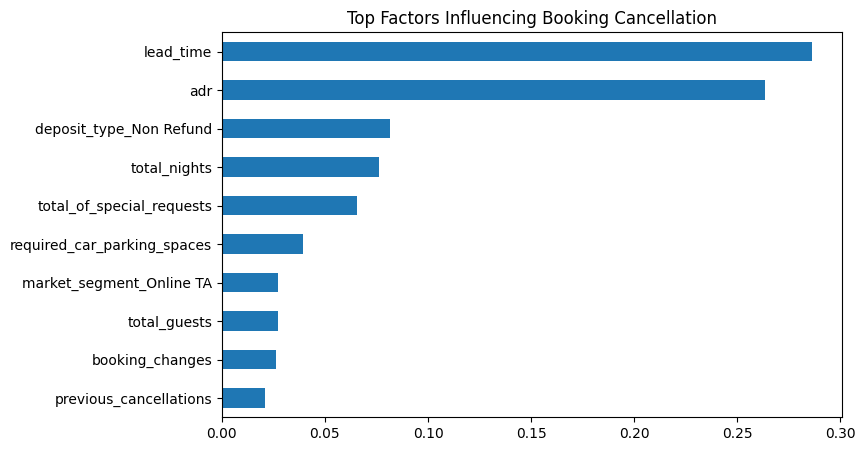

In [351]:
feature_importance.head(10).plot(
    kind='barh', figsize=(8,5)
)
plt.title("Top Factors Influencing Booking Cancellation")
plt.gca().invert_yaxis()
plt.show()


## Conclusion & Recommendations

**Summary:** Random Forest performed better than Logistic Regression in our experiments. The most influential features for cancellations were `lead_time`, `deposit_type`, and `total_of_special_requests`.

**Business recommendations:**
- **Require deposits** for bookings deemed high-risk to reduce no-shows.
- **Use dynamic pricing and targeted offers** during months with higher cancellation rates.
- **Monitor long lead-time bookings** and consider flexible policies or incentives to reduce cancellations.

